In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial.distance as spd

# Generate data
 * Generate a random dataset for clustering using \_randn\_
 * Seperate into 2 clusters

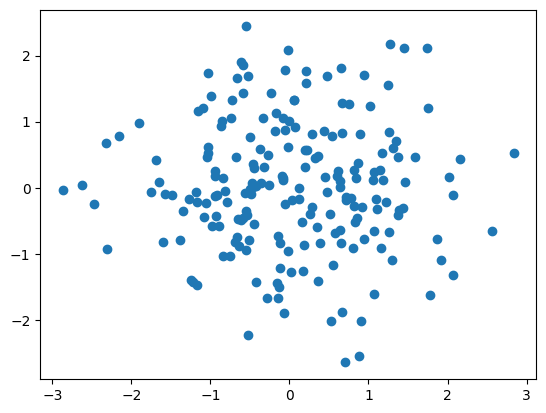

In [30]:
X = np.random.randn(200, 2)
plt.scatter(X[:,0], X[:,1])

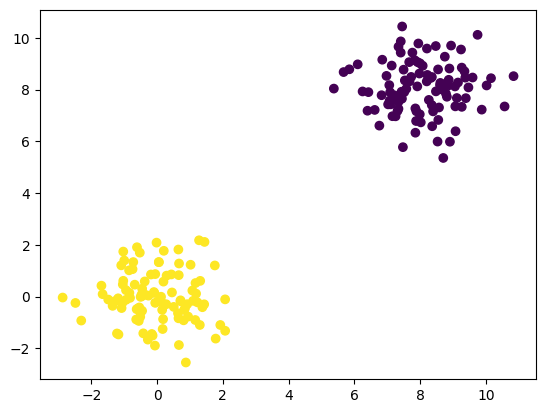

In [31]:
X[100:,:] += 8
C = np.concatenate((np.ones(100), np.zeros(100)))
plt.scatter(X[:,0], X[:,1], c=C, cmap="viridis")

If the number of clusters is unknown, use silhouette scores to work out

In [32]:
def assign_to_cluster(X, C):
    """
    Given the dataset X and cluster centers C, identify which cluster center the data point belongs to
    :param X: dataset of points
    :param C: cluster centers
    :return: The dataset with each cluster attached
    """
    D = spd.cdist(X, C)
    closest = D.argmin(axis=1)
    return closest

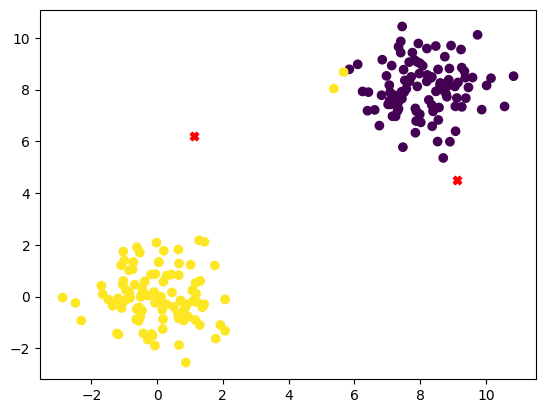

In [33]:
k = 2 # number of clusters
C = np.random.uniform(X.min(), X.max(), (k, X.shape[1]))
clusters = assign_to_cluster(X, C)
plt.scatter(X[:,0], X[:,1], c=clusters, cmap="viridis")
plt.scatter(C[:,0], C[:,1], marker='X', c='r')

In [34]:
def k_means(X, C, k=2):
    """
    Implement K means algorithm, show each step with a plot
    :param X:
    :param C:
    :param k:
    :return:
    """

    # generate centres
    centres = np.random.uniform(X.min(), X.max(), (k, X.shape[1]))
    plt.scatter(X[:,0], X[:,1], c=C, cmap="viridis")
    plt.scatter(centres[:,0], centres[:,1], marker='X', c='r')

    #record prev centres
    old_centres = np.tile(np.inf, centres.shape)

    #iter count
    itr = 0

    while not (centres == old_centres).all():
        # update centres and copy old centres
        old_centres = centres.copy()
        itr += 1

        # identify which cluster centre each point is closest to
        clusters = assign_to_cluster(X, C)

        # find new centres
        centre = np.zeros_like(centres)
        for i in range(centre.shape[0]):
            I = np.nonzero(clusters == i)[0]
            centres[i] = X[I,:].mean(axis=0)

        # show progress
        plt.figure()
        plt.scatter(X[:,0], X[:,1], c=centres, cmap="viridis")
        plt.scatter(centres[:,0], centres[:,1], marker='X', c='r')
        plt.title("iteration: ", itr)
    plt.title("iteration: "+ itr+ " converged")

ValueError: 'c' argument has 4 elements, which is inconsistent with 'x' and 'y' with size 200.

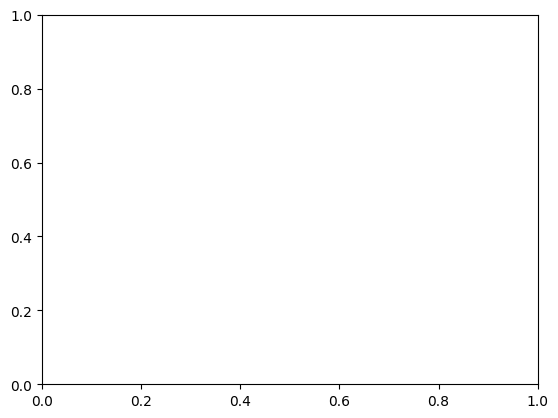

In [35]:
k_means(X, C)

C:\Users\nathan.savage\PycharmProjects\uni 2005 set exercises\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


TypeError: scatter() missing 1 required positional argument: 'y'

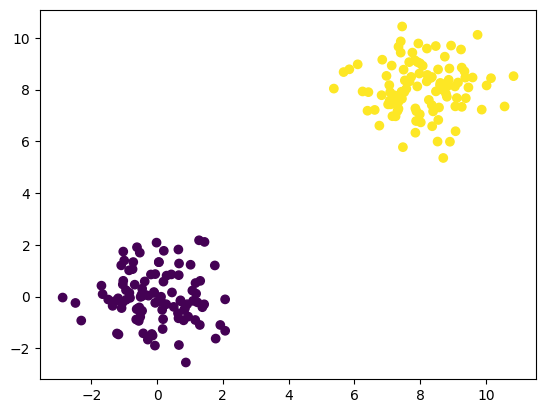

In [36]:
import sklearn.cluster as skc

clusterer = skc.KMeans(n_clusters=2)
clusterer.fit(X)
plt.scatter(X[:,0], X[:,1], c=clusterer.labels_, cmap="viridis")
plt.scatter(clusterer)

Text(0, 0.5, 'sepal width')

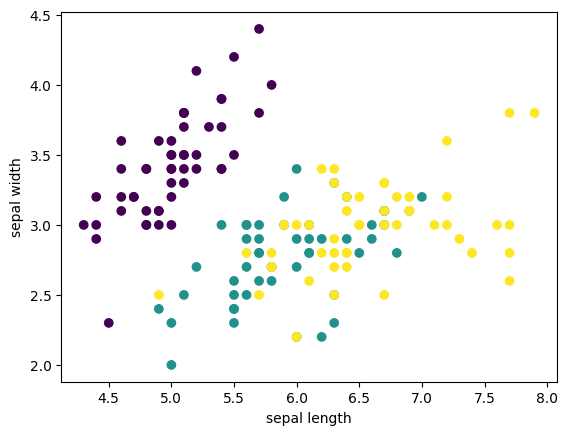

In [37]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
t = iris.target

plt.scatter(X[:,0], X[:,1], c=t, cmap='viridis')
plt.xlabel("sepal length")
plt.ylabel("sepal width")

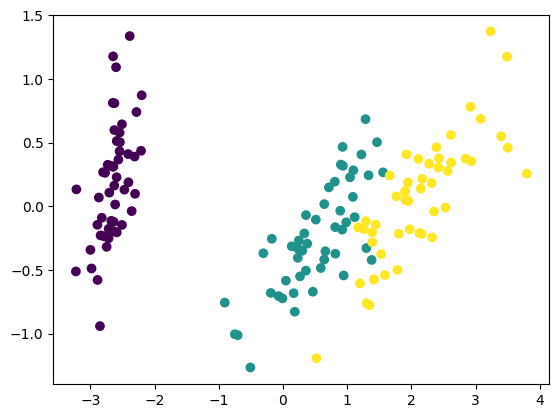

In [38]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
projection = pca.fit_transform(X)

plt.scatter(projection[:,0], projection[:,1], c=t, cmap='viridis')

In [39]:
clusterer = skc.KMeans(n_clusters=3)
clusterer.fit()

TypeError: fit() missing 1 required positional argument: 'X'

In [ ]:
from sklearn import neighbors

classifier = neighbors.KNeighborsClassifier(n_neighbors=7)
classifier.fit(projection, t)
y = classifier.predict()